<a href="https://colab.research.google.com/github/xvenkyx/EDA-1/blob/main/end_to_end_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import pandas and numpy
### Very important for data handling

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("/content/placement.csv")

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


## To remove the one unwanted column in the beginning you can do the next step :

In [4]:
df = df.iloc[:,1:]

In [5]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


## To check if any null values are there, you can perform the next step:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


## To plot the data set :

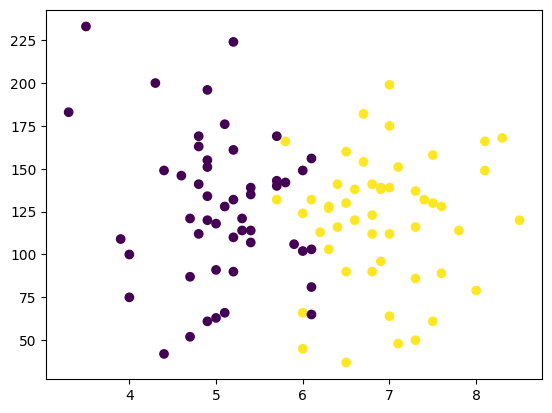

In [7]:
import matplotlib.pyplot as plt
plt.scatter(df['cgpa'], df['iq'], c = df['placement'])

## Seperate the input and output columns

In [8]:
x = df.iloc[:,0:2]
y = df.iloc[:, -1]

## Split the data into training and test models:

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1)

## Scale the values :

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [11]:
x_train = scaler.fit_transform(x_train)

In [12]:
x_test = scaler.transform(x_test)

In [13]:
x_train

array([[-0.08950085, -0.42739275],
       [-0.69579695,  2.40942662],
       [ 0.0837266 , -1.41306728],
       [-0.60918323, -0.23506601],
       [ 0.43018152,  0.87081273],
       [ 0.86325016,  1.23142536],
       [-0.78241068,  1.2554662 ],
       [-1.04225187,  1.08718031],
       [ 1.12309135,  0.31787336],
       [ 0.86325016, -0.2831477 ],
       [ 0.86325016, -1.43710812],
       [ 1.81600118,  1.01505778],
       [-0.69579695,  0.89485357],
       [-0.95563814,  0.65444515],
       [-0.60918323, -0.06678012],
       [-1.1288656 , -0.88416875],
       [-0.69579695, -0.33122938],
       [-0.17611458,  0.43807757],
       [-0.78241068, -1.38902644],
       [-0.00288712,  0.60636346],
       [-0.5225695 , -0.40335191],
       [-0.00288712, -1.89388412],
       [-1.7351617 , -0.5716378 ],
       [ 1.38293254,  0.10150578],
       [ 0.77663643,  0.3419142 ],
       [-0.00288712, -1.38902644],
       [ 2.16245609, -0.09082096],
       [ 0.0837266 , -1.0284138 ],
       [ 0.86325016,

## Model Training

In [14]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(x_train,y_train)

LogisticRegression()

## Predict by using the test data :

In [15]:
y_pred = clf.predict(x_test)

## Find the accuracy score :

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9

## To check the decision boundary :
### If in some cases the mlxtend shows some errors then try upgrading mlxtend first, because google by default uses an older version of it.

In [17]:
!pip install mlxtend --upgrade --no-deps

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 27.5 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


<Axes: >

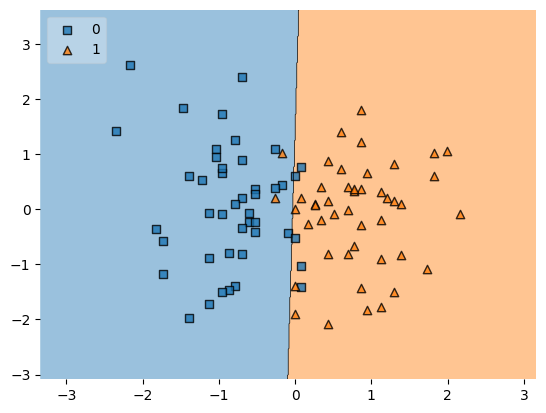

In [18]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_train, y_train.values, clf=clf, legend = 2)

### Build and Export the Model :

In [19]:
import pickle
pickle.dump(clf,open('model.pkl','wb'))